# Cleaning candidatos

<a id = 'table'> </a>
## Table of contents

- Part I - Gathering the data
    - [Key Points](#key)
    - [Converting DTA to CSV file](#dta)
    - [Reading the CSV file](#read)    

- Part II - Assessing and cleaning
    - [Exploring the table](#explore)
    - [Making copies](#copies)
    - [Assesment and cleaning](#clean)
    - [Storing Data](#store)
    
- Part III - Analysis and visualization
    - [¿Cuál es el porcentaje de colocación?](#colocacion)
    - [¿En cuáles programas se originan las postulaciones?](#programa)
    - [Estatus final de vínculo](#vinculo)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import sys

# for visualizing NAN
import missingno as msno
%matplotlib inline

# for visualizing all columns
pd.options.display.max_columns = None


<a id='key'></a>
[Return to Table of Contents](#table)

## Key Points for assessing and cleaning

- The BID2.CANDIDATO.dta file contains almost 2,350,000 records and 159 fields (columns).
- The analysis will focus on the next federal entities of the SNE ofices: Chiapas, Nuevo León, Jalisco, Veracruz, Ciudad de México, and Estado de México.
- Also, the analysis will be delimited to the next fields: 
    - 0   id
    - 1   id_solicitante
    - 2   entidadfed_sne
    - 4   sexo
    - 6   edad
    - 8   edocivil 
    - 9   cedo_domicilio
    - 11  nomb_localidad_domicilio
    - 14  escolaridad
    - 15  carrera
    - 16  sit_academica
    - 19  idioma
    - 54  qempleobusca
    - 55  salariopretente
    - 60  tipoexperiencia
    - 61  disp_viajar
    - 62  disp_vivir
    - 70  funciones    
    - 71  trabajaactualmente
    - 72  motivo
    - 73  fchcomienzo_busqueda
    - 119 clen_idcvelengua
    - 120 tipodiscapacidad
    - 143 id_ocupacion
    - 144 ocupacion
    - 145 id_area
    - 146 area
    - 147 id_subarea
    - 148 subarea
    - 157 colocados
    - 158 estatus_candidato_colocados

PRUEBA PRUEBA

In [3]:
my_iterator = pd.read_stata('BID2.CANDIDATO.dta', iterator=True)

In [7]:
start = time.time()

a_chunk = my_iterator.get_chunk(10000)
filter_cols = a_chunk.iloc[:,np.r_[0,1,2,4,6,8,9,11,14,15,16,19,54,55,60,61,62,70,71,119]]
    
filter_rows = filter_cols['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
z = filter_cols[filter_rows]
z.to_csv('candidatosPrueba.csv', mode='a', index=False, header=False)   #‘a’ append.
 
end = time.time()
end-start

20.648345470428467

In [107]:
start = time.time()
# columnas a escoger
y = a_chunk.iloc[:,np.r_[0,1,2,4,6,8,9,11,14,15,16,19,54,55,60,61,62,70,71,119]]
end = time.time()
end - start


0.009138107299804688

In [114]:
z = pd.DataFrame()
filter_edo = y['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
z = z.append(y[filter_edo])
type(filter_edo)

pandas.core.series.Series

In [102]:
z.shape

(126, 20)

In [38]:
%timeit y.at[i,'entidadfed_sne']

4.77 µs ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%timeit y.loc[i,'entidadfed_sne']

7.73 µs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
start = time.time()
x.loc[:,['id','id_solicitante','fch_registro','tsol_fch_nacimiento_2','cedo_nacimiento','cmun_nombre_domicilio']]
end = time.time()
end - start

0.0014042854309082031

In [24]:
df = a_chunk.query('trac_id == 12000')
df['id_solicitante'].unique()

array([14902401.])

<a id='dta'></a>
[Return to Table of Contents](#table)
## Converting DTA to CSV file

In [12]:
#  First we create a reader with a small chunk in order to know the column names
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=2)
my_stata_reader._encoding = 'utf-8'
my_stata_reader.variable_labels()

{'id': 'ID',
 'id_solicitante': 'ID_SOLICITANTE',
 'entidadfed_sne': 'ENTIDADFED_SNE',
 'fch_registro': 'FCH_REGISTRO',
 'sexo': 'SEXO',
 'tsol_fch_nacimiento_2': 'TSOL_FCH_NACIMIENTO_2',
 'edad': 'EDAD',
 'cedo_nacimiento': 'CEDO_NACIMIENTO',
 'edocivil': 'EDOCIVIL',
 'cedo_domicilio': 'CEDO_DOMICILIO',
 'cmun_nombre_domicilio': 'CMUN_NOMBRE_DOMICILIO',
 'nomb_localidad_domicilio': 'NOMB_LOCALIDAD_DOMICILIO',
 'datosconfidenciales': 'DATOSCONFIDENCIALES',
 'cod_postal_domicilio': 'COD_POSTAL_DOMICILIO',
 'escolaridad': 'ESCOLARIDAD',
 'carrera': 'CARRERA',
 'sit_academica': 'SIT_ACADEMICA',
 'tsol_prospera': '',
 'tsol_prospera_num': '',
 'idioma': 'IDIOMA',
 'porcj_idioma': 'PORCJ_IDIOMA',
 'certificacion': 'CERTIFICACION',
 'idioma2': 'IDIOMA2',
 'porcj_idioma2': 'PORCJ_IDIOMA2',
 'certif_idioma2': 'CERTIF_IDIOMA2',
 'idioma3': 'IDIOMA3',
 'certif_idioma3': 'CERTIF_IDIOMA3',
 'porcj_idioma3': 'PORCJ_IDIOMA3',
 'habilidad': 'Habilidad',
 'procesadortextos': 'ProcesadorTextos',
 'hoja

In [2]:
# The my_stata_reader object allows us reading the big dta file by chunks
# filtering by the columns that we need 
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=10000, 
                                columns=['id','id_solicitante', 'entidadfed_sne', 'sexo', 'edad', 'edocivil', 
                                         'cedo_domicilio', 'nomb_localidad_domicilio','escolaridad', 'carrera', 
                                         'sit_academica', 'idioma', 'qempleobusca', 'salariopretente',
                                         'tipoexperiencia', 'disp_viajar', 'disp_vivir', 'funciones', 
                                         'trabajaactualmente', 'motivo', 'fchcomienzo_busqueda', 'clen_idcvelengua',
                                         'tipodiscapacidad', 'id_ocupacion', 'ocupacion', 'id_area', 'area',
                                         'id_subarea', 'subarea', 'colocados', 'estatus_candidato_colocados'])
my_stata_reader._encoding = 'utf-8'

In [9]:
# start y end will measure time
start = time.time()
first = True

# for each chunk it will do the next:
for chunk in my_stata_reader:
    if first:        # only append the header if it is the first chunk:
        # filtering the rows by the given values for entidadfed_sne
        filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
        z = chunk[filter_rows]
        z.to_csv('candidatos.csv', mode='a', index=False, header=True)  #‘a’ append
        print('.', end = '')
        first = False
        
    # Omit the header for the next chunks
    # filtering the rows by the given values for entidadfed_sne
    # filter_rows es una lista de bools
    filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
    z = chunk[filter_rows]    
    z.to_csv('candidatos.csv', mode='a', index=False, header=False) #‘a’ append.
    # Print a dot each time a chunk is appended
    print('.', end = '')
end = time.time()
print (('Total time: ') + str(end - start))

...........................................................................................................................................................................................................................................Total time: 200.50592827796936


In [3]:
# Verifiquemos el tamanio del CSV
filesize= os.stat('candidatos.csv').st_size
print(filesize)

547241419


<a id='read'></a>
[Return to Table of Contents](#table)
## Reading the CSV

The successful use of pd.read_csv may vary because of the <b>file size, type of processor, memory, code,</b> or some other variables.

If the code runs out of memory, you can try reading in chunks.

In [4]:
candidatos = pd.read_csv('candidatos.csv')
candidatos.head(1)

/home/liliana/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,NO,Ajuste de personal,1999-01-01,No,Ninguna,214301,Trabajadora social,17,SECTOR SALUD / MEDICINA,101,ASESORAMIENTO PSICOLÓGICO Y TRABAJO SOCIAL,1,SI


<a id='explore'></a>
[Return to Table of Contents](#table)
## Exploring the table


In [5]:
candidatos.head()

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,NO,Ajuste de personal,1999-01-01,No,Ninguna,214301,Trabajadora social,17,SECTOR SALUD / MEDICINA,101,ASESORAMIENTO PSICOLÓGICO Y TRABAJO SOCIAL,1,SI
1,2347300,117701,CHIAPAS,FEMENINO,33,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,LICENCIATURA,Contabilidad,PASANTE,NINGUNO,Asistente de gerencia administrativa,3300.0,NaN,NO,NO,NaN,NO,Nunca ha trabajado,2016-02-19,No,Ninguna,251103,Asistente de gerencia administrativa,2,ADMINISTRACIÓN,5,ADMINISTRACIÓN GENERAL,0,NO
2,2347299,125801,CHIAPAS,FEMENINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PROFESIONAL TÉCNICO (CONALEP),Informática administrativa,DIPLOMA O CERTIFICADO,INGLÉS,Auxiliar contable,3000.0,NINGUNA,NO,NO,NaN,NO,Nunca ha trabajado,2016-04-20,No,Ninguna,212109,Auditor contable,1,CONTABILIDAD,2,AUXILIAR CONTABLE/APOYO CONTABLE,1,SI
3,2347298,130401,CHIAPAS,MASCULINO,25,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PREPA O VOCACIONAL,No especificado de nombre de carrera técnica o...,DIPLOMA O CERTIFICADO,NINGUNO,Capturista de datos,4250.0,NINGUNA,NO,NO,NaN,NO,Cambio de trabajo,2015-03-30,No,Ninguna,511601,Mesero,18,"TURISMO, HOSPEDAJE Y RESTAURANTES",130,SERVICIO DE MESEROS / CAMAREROS,1,SI
4,2347297,134201,CHIAPAS,MASCULINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,SECUNDARIA/SEC. TÉCNICA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Cajero,2500.0,NINGUNA,NO,NO,NaN,NO,Nunca ha trabajado,1900-01-01,No,Ninguna,312101,Cajero,5,SERVICIOS BANCARIOS Y FINANCIEROS,18,CAJA,0,NO


In [14]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265855 entries, 0 to 1265854
Data columns (total 31 columns):
id                             1265855 non-null int64
id_solicitante                 1265855 non-null int64
entidadfed_sne                 1265855 non-null object
sexo                           1265855 non-null object
edad                           1265855 non-null int64
edocivil                       1265855 non-null object
cedo_domicilio                 1265855 non-null object
nomb_localidad_domicilio       1265855 non-null object
escolaridad                    1265855 non-null object
carrera                        1265855 non-null object
sit_academica                  1265855 non-null object
idioma                         1265855 non-null object
qempleobusca                   1265855 non-null object
salariopretente                1265855 non-null float64
tipoexperiencia                535861 non-null object
disp_viajar                    1265855 non-null object
disp_vivir

In [19]:
candidatos[candidatos.duplicated()].sort_values(by='nomb_localidad_domicilio')

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
1802,2347194,206501,CHIAPAS,MASCULINO,74,VIUDO (A),CHIAPAS,26 DE OCTUBRE,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,PANADERO,NO,NO,NaN,NO,Nunca ha trabajado,2016-02-15,No,Ninguna,751301,Panadero,31,OFICIOS Y SERVICIOS,214,ELABORACIÓN Y PROCESAMIENTO DE ALIMENTOS Y BEB...,1,SI
1791,2347255,172401,CHIAPAS,MASCULINO,85,DIVORCIADO (A),CHIAPAS,26 DE OCTUBRE,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,PANADERIA,NO,NO,NaN,NO,Nunca ha trabajado,2016-07-15,No,Ninguna,751301,Panadero,31,OFICIOS Y SERVICIOS,214,ELABORACIÓN Y PROCESAMIENTO DE ALIMENTOS Y BEB...,1,SI
3509,2337795,12374701,JALISCO,FEMENINO,37,DIVORCIADO (A),MORELOS,3RA. AMPLIACION LAZARO CARDENAS,PRIMARIA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Fumigador agrícola (cultivos),6000.0,CASI TODO EL TIEMPO HE TRABAJADO EN LA FUMIGAC...,NO,NO,NaN,NO,Ajuste de personal,2013-10-29,No,Ninguna,261302,Fumigador agrícola (cultivos),15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3502,2337811,12342201,CIUDAD DE MEXICO,FEMENINO,31,SOLTERO (A),CIUDAD DE MÉXICO,AA MILPA ALTA,CARRERA TÉCNICA,Alimentos,DIPLOMA O CERTIFICADO,NINGUNO,Asistente ejecutiva,4250.0,NaN,NO,NO,NaN,NO,Nunca ha trabajado,2013-01-20,NO,Ninguna,311101,Secretaria,3,APOYO DE OFICINA,6,ASISTENCIA EJECUTIVA Y/O PERSONAL,1,SI
3533,2337714,12555101,CIUDAD DE MEXICO,FEMENINO,35,SOLTERO (A),CIUDAD DE MÉXICO,AA MILPA ALTA,PREPA O VOCACIONAL,Administración,DIPLOMA O CERTIFICADO,INGLÉS,Administrador,2500.0,CULTIVO DE INVERNANDERO,NO,NO,NaN,NO,Nunca ha trabajado,2016-05-01,No,Ninguna,199902,Administrador,2,ADMINISTRACIÓN,5,ADMINISTRACIÓN GENERAL,1,SI
3460,2337908,12113201,JALISCO,MASCULINO,48,CASADO (A),GUERRERO,ACAQUILA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4000.0,JORNALERO,SI,SI,JORNALERO,NO,Termino de contrato,2013-01-05,0,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3340,2338427,11422201,JALISCO,FEMENINO,42,CASADO (A),GUERRERO,ACAQUILA,PRIMARIA,Ninguna,NINGUNO,NINGUNO,Peón jornalero agrícola,6000.0,JORNALERO,SI,SI,JORNALERO,NO,Termino de contrato,2014-08-09,"Si, NAHUAT",Ninguna,911107,Peón jornalero agrícola,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,87,AGRONOMÍA Y SERVICIOS AGRÍCOLAS,0,NO
3251,2338734,11022201,JALISCO,MASCULINO,31,CASADO (A),GUERRERO,ACAQUILA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4250.0,NaN,NO,NO,JORNALERO,NO,Termino de contrato,2013-01-01,NO,Ninguna,313201,Almacenista,24,"TRANSPORTE, DISTRIBUCIÓN Y LOGÍSTICA",163,ADQUISICIONES E INVENTARIO,0,NO
3332,2338444,11395301,JALISCO,FEMENINO,40,CASADO (A),GUERRERO,ACATEMPA,SIN INSTRUCCIÓN,Ninguna,NO ESPECIFICADO,NINGUNO,Agricultor,4250.0,NaN,NO,NO,JORNALERO,NO,Termino de contrato,2013-01-06,NO,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO
3281,2338591,11210301,JALISCO,MASCULINO,44,CASADO (A),GUERRERO,ACATEMPA,PRIMARIA,Ninguna,NINGUNO,NINGUNO,Agricultor,6000.0,CORTE DE CAÑA,SI,SI,CORTE DE CAÑA,NO,Termino de contrato,2014-01-08,0,Ninguna,611601,Agricultor,15,CONSERVACIÓN AGRÍCOLA Y ANIMALES,95,TRABAJO DE CULTIVO,0,NO


In [11]:
candidatos.entidadfed_sne.unique()

array(['NUEVO LEON', 'CHIAPAS', 'VERACRUZ', 'JALISCO', 'CIUDAD DE MEXICO',
       'MEXICO, ESTADO DE'], dtype=object)

In [31]:
candidatos.edocivil.unique()

array(['SOLTERO (A)', 'DIVORCIADO (A)', 'CASADO (A)', 'VIUDO (A)',
       'UNION LIBRE', 'NO ESPECIFICADO'], dtype=object)

In [4]:
a = candidatos.cedo_domicilio.unique()
print(sorted(a))

['AGUASCALIENTES                     ', 'BAJA CALIFORNIA                    ', 'BAJA CALIFORNIA SUR                ', 'CAMPECHE                           ', 'CHIAPAS                            ', 'CHIHUAHUA                          ', 'CIUDAD DE MÉXICO', 'COAHUILA                           ', 'COLIMA                             ', 'DURANGO                            ', 'GUANAJUATO                         ', 'GUERRERO                           ', 'HIDALGO                            ', 'JALISCO                            ', 'MEXICO, ESTADO DE                  ', 'MICHOACAN                          ', 'MORELOS                            ', 'NAYARIT                            ', 'NUEVO LEON                         ', 'OAXACA                             ', 'PUEBLA                             ', 'QUERETARO                          ', 'QUINTANA ROO                       ', 'SAN LUIS POTOSI                    ', 'SINALOA                            ', 'SONORA                             ', 'TAB

In [91]:
candidatos.escolaridad.unique()

array(['SIN INSTRUCCIÓN', 'LICENCIATURA', 'PROFESIONAL TÉCNICO (CONALEP)',
       'PREPA O VOCACIONAL', 'SECUNDARIA/SEC. TÉCNICA',
       'SABER LEER Y ESCRIBIR', 'PRIMARIA', 'T. SUPERIOR UNIVERSITARIO',
       'CARRERA TÉCNICA', 'CARRERA COMERCIAL', 'MAESTRÍA', 'DOCTORADO'],
      dtype=object)

In [90]:
candidatos.carrera.unique().tolist()

['Ninguna',
 'Contabilidad',
 'Informática administrativa',
 'No especificado de nombre de carrera técnica o comercial de nivel medio superior',
 'Administración',
 'Contador público',
 'No especificado de nombre de carrera técnica o comercial de nivel superior',
 'Contabilidad pública',
 'Derecho',
 'Tecnologías de la información',
 'Salud comunitaria',
 'Administración empresarial',
 'Contaduría pública',
 'Administración de empresas',
 'Contabilidad administrativa',
 'Turismo',
 'No especificado de nombre de carrera técnica o comercial de nivel básico',
 'Auxiliar de contabilidad',
 'Mercadotecnia',
 'Letras latinoamericanas',
 'Economía',
 'Navegación y pesca marina',
 'Carpintería',
 'Químico industrial',
 'Administración de recursos humanos',
 'Agronomía',
 'Negocios internacionales',
 'Capturista de datos',
 'Computación',
 'Auxiliar de enfermería',
 'Ingeniería electrónica',
 'Comercio',
 'Agricultura',
 'Administración aeroportuaria',
 'Pedagogía',
 'Agrícola (cultivos básicos

In [94]:
candidatos.sit_academica.unique()

array(['ESTUDIANTE', 'PASANTE', 'DIPLOMA O CERTIFICADO', 'NINGUNO',
       'TRUNCA', 'NO ESPECIFICADO', 'TITULADO'], dtype=object)

In [95]:
candidatos.idioma.unique()

array(['NINGUNO', 'INGLÉS', 'PORTUGUÉS', 'FRANCÉS', 'ITALIANO', 'ALEMÁN',
       'JAPONÉS', 'CHINO'], dtype=object)

In [103]:
candidatos.tipoexperiencia.unique().tolist()

[nan,
 'NINGUNA',
 'NINGUNO',
 'PANADERIA',
 'SIEMBRA Y COSECHA',
 'CULTIVO',
 'MANEJO DE CULTIVO',
 'XXXX',
 'PANADERO',
 'CULTIVO Y SIEMBRA',
 'LABORES DEL CAMPO',
 'CULTIVO DE CHILE',
 'SD',
 'CORTE DE UVA Y CITRICOS',
 'CORTE DEUVA',
 'CULTIVO DE UVA',
 'CULTIVO DE MAIZ Y FRIJOL',
 'CORTE DE UVA Y NARANJA',
 'CULTIVO DE MAIZ UVA PIMIENTA CAFE',
 'ATENCION A CLIENTES Y VENTAS',
 'ADQUIRIDA POR EXPERIENCIA LABORAL',
 'CULTIVO DE HORTALIZA',
 'CORTE Y MANEJO DE COSECHAS',
 'COSECHA DE HORTALIAS',
 'CORTE DE TOMATE',
 'CORTE DE NARANJA Y UVA',
 'CORTE Y PREPARACION DE SUELO',
 'ELABORACION DE REPORTES FINANCIEROS, ELABORACION DE FACTURAS, CONCILIACIONES BANCARIAS, VENTAS, ARCH',
 'ELABORACION DE DOCUMENTOS DE TEXTO,  A TENCION A CLIENTES, ASESORIA JURIDICA, REVISION DE EXPEDIENTE',
 'PROCESO DE ENSEÑANAZ APRENDIZAJE',
 'COSECHAR',
 'COSECHA DE MAIZ',
 'ATENCION A CLIENTES, CONTROL DE ENTRADAS Y SALIDAS, ADMINISTRATIVAS, ELABORACION DE FACTURAS',
 'JORNALERO AGRICOLA',
 'AGRICULTOR',
 '

In [104]:
candidatos.disp_viajar.unique()

array(['NO', 'SI'], dtype=object)

In [105]:
candidatos.disp_vivir.unique()

array(['NO', 'SI'], dtype=object)

In [111]:
candidatos.funciones.unique().tolist()

[nan,
 'CORTE DE TOMATE',
 'CORTE Y REPLANTACION',
 'LABORES DE CAMPO',
 'XXXX',
 'SD',
 'XXXXX',
 'CORTE DE UVAS',
 'CULTIVO DE UVA',
 'CULTIVO DE CAFE',
 'CULTIVO DE HORTALIZAS',
 'CORTE DE UVA',
 'CULTIVO Y COSECHA DE TOMATE',
 'NINGUNO',
 'COBRANZAS, CAPTURA DE INFORMACION, ATENCION A CLIENTES',
 'XXXXXXXXXXXX',
 'LIMPIEZA DE MAIZ',
 'ACOMODO DE MERCANCIAS',
 'JORNALERO AGRICOLA',
 'CULTIVO DE HORTALIZA',
 'CORTE Y DESOJE DE TOMATES',
 'CORTE',
 'AGRICULTURA',
 'SIN DATOS',
 'CORTE DE PEPINO Y CHILE',
 'HACEO DE LA CASA',
 'SIEMBRA Y COSECHA',
 'CORTE Y DESOJE DE TOMATE',
 'XXXXXXX',
 '0',
 'CULTIVO Y COSECHA DE UVA',
 'COSECHA DE UVA',
 'CULTIVOS',
 'COSECHA DE UVA CALABAZA',
 'SSS',
 'PROMOTORA VENTA DE LIBROS Y ASISTENCIA A FERIAS',
 'AGRICOLA',
 'ECOBRO DE PAGOS Y SERVICIOS OFRECIDOS POR LA EMPRESA A LOS CLIENTES EN EL AREA DE PUNTO DE VENTA',
 'JORNALERO',
 'ACTIVIDAD DE CAMPO',
 'OBRERO',
 'ACTIVIDADES DE CAMPO',
 'NO',
 'DESBRADO',
 'XXXXXXXX',
 'RALEO Y PIZCA DE VID',
 'AUX

In [109]:
candidatos.clen_idcvelengua.unique()

array(['No', 'NO', 'Si, NAHUAT', '0', 'Si, TZELTZ', 'Si, TOTONA',
       'Si, TZOTZI', 'Si, POPOLU', 'Si, TOJOLA', 'Si, PUREPE',
       'Si, POPOLO', 'Si, CHOL', 'Si, HUASTE', 'Si, OTRAS ', 'Si, NO ESP',
       'Si, MIXTEC', 'Si, ZAPOTE', 'Si, MAZATE', 'Si, AGUACA',
       'Si, OTOMI', 'Si, MAZAHU', 'Si, DE LAL', 'Si, PAPAGO', 'Si, SERI',
       'Si, HUICHO', 'Si, CHINAN', 'Si, TRIQUI', 'Si, AMUZGO',
       'Si, MOTOCI', 'Si, ZOQUE', 'Si, MAYA', 'Si, MIXE', 'Si, CHATIN',
       'Si, TLAPAN', 'Si, CUCAPA', 'Si, MATLAT', 'Si, LACAND', 'Si, MAYO'],
      dtype=object)

In [30]:
candidatos.groupby('edad')['id'].nunique()


edad
3         3
4         2
7         1
9         3
10        1
11        1
13        2
14        1
15        6
16       22
17      344
18     3929
19    11082
20    23908
21    32622
22    40658
23    55466
24    73174
25    82054
26    83177
27    78600
28    71948
29    63463
30    55912
31    49820
32    44175
33    39819
34    36437
35    34059
36    31312
      ...  
67     1430
68     1264
69     1038
70      918
71      869
72      666
73      610
74      504
75      444
76      409
77      335
78      259
79      227
80      166
81      138
82      137
83      116
84       87
85       65
86       59
87       44
88       34
89       13
90       14
91       11
92       15
93        9
94        3
95        1
96        1
Name: id, Length: 90, dtype: int64

In [87]:
candidatos.sexo.value_counts()

MASCULINO    677733
FEMENINO     588122
Name: sexo, dtype: int64

In [86]:
candidatos['idioma'].value_counts()

NINGUNO      806750
INGLÉS       448626
FRANCÉS        5452
ITALIANO       2006
ALEMÁN         1201
PORTUGUÉS      1069
JAPONÉS         560
CHINO           191
Name: idioma, dtype: int64

In [21]:
candidatos['funciones'].value_counts()

\t\t\t\t\t                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   118242
NINGUNO                                                                                                             

In [112]:
candidatos.escolaridad.unique()

array(['SIN INSTRUCCIÓN', 'LICENCIATURA', 'PROFESIONAL TÉCNICO (CONALEP)',
       'PREPA O VOCACIONAL', 'SECUNDARIA/SEC. TÉCNICA',
       'SABER LEER Y ESCRIBIR', 'PRIMARIA', 'T. SUPERIOR UNIVERSITARIO',
       'CARRERA TÉCNICA', 'CARRERA COMERCIAL', 'MAESTRÍA', 'DOCTORADO'],
      dtype=object)

In [21]:
candidatos.trabajaactualmente.unique()

array(['NO', 'SI'], dtype=object)

In [20]:
candidatos.motivo.unique()

array(['Ajuste de personal', 'Nunca ha trabajado', 'Cambio de trabajo',
       'Termino de contrato', 'Despido', 'Tener más de un empleo',
       'Retiro voluntario', 'Cerró/quebró la fuente de trabajo',
       'Otro Especifique: JORNALERO AGRICOLA', nan,
       'Otro Especifique: MIGRAR PARA GANAR',
       'Otro Especifique: SEPARACION VOLUNTARIA',
       'Otro Especifique: MIGRAR', 'Otro Especifique: NO APLICA',
       'Otro Especifique: NECESITO DINERO', 'Otro Especifique: OTRO',
       'Otro Especifique: MANUTENCION DE HIJOS',
       'Otro Especifique: JORNALERO AGRÍCOLA',
       'Otro Especifique: NO INDICA', 'Otro Especifique: AUTOEMPLEARME',
       'Otro Especifique: TERMINO DE CONTRATO',
       'Otro Especifique: FALTA DE HONESTIDAD DE LA EMPRESA',
       'Otro Especifique: AGRICULTOR',
       'Otro Especifique: PARA OBTENER INGRESOS ECONOMICOS',
       'Otro Especifique: PORQUE YA CUENTO CON TIEMPO DISPONIBLE PARA TRABAJAR',
       'Otro Especifique: CORTE DE CAÑA', 'Otro Espe

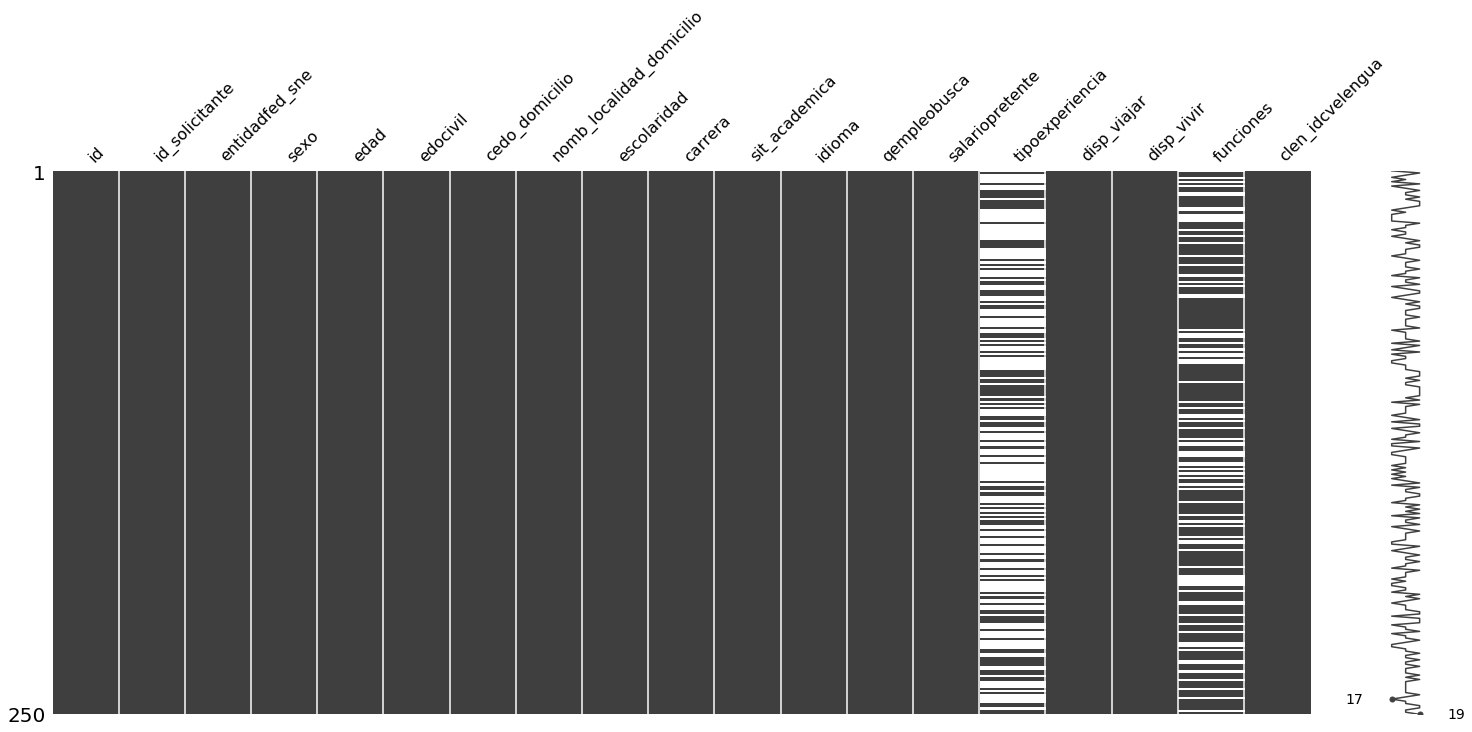

In [8]:
#NaN in candidatos
candidatos = candidatos.replace("nan",np.nan)
msno.matrix(candidatos.sample(250));

In [10]:
candidatos.idioma.value_counts()

NINGUNO       806750
INGLÃS       448626
FRANCÃS        5452
ITALIANO        2006
ALEMÃN         1201
PORTUGUÃS      1069
JAPONÃS         560
CHINO            191
Name: idioma, dtype: int64

<a id='copies'></a>
[Return to Table of Contents](#table)
## Making copies

The first step before any cleaning is **always make copies**

In [6]:
candidatos_clean = candidatos.copy()

<a id='clean'></a>[Return to Table of Contents](#table)
## Assesment and cleaning
#### Quality changes
1. [Wrong Datatypes](#datatypes)
2. [The value 'MEXICO, ESTADO DE' in `entidadfed_sne` must be changed ](#entidad_fed)
3. [Some candidates have unexpected values for `edad`.](#edad)
4. [Some values in `tipo_experiencia` can be unified](#unify) 
5. [Values in `clen_idcvelengua` must be completed](#complete_lenguas)
6. [`clen_idcvelengua` column name is not descriptive](#lengua_indigena)

#### Tidiness changes
Not a single so far.

<a id='datatypes'></a>
### 1. Wrong datatypes 


In [6]:
postulaciones_clean['trac_id'] =  postulaciones_clean['trac_id'].astype(int)

candidatos_clean.entidadfed_sne

pandas.core.series.Series

<a id='entidad_fed'></a>
### 2. The value 'MEXICO, ESTADO DE' in `entidadfed_sne` must be changed 
'ESTADO DE MEXICO' must be used instead of 'MEXICO, ESTADO DE', which is a better reading of the value.

In [12]:
# with replace function
candidatos_clean = candidatos_clean.replace('MEXICO, ESTADO DE','ESTADO DE MEXICO')

In [13]:
# Verify change
candidatos_clean.entidadfed_sne.unique()

array(['NUEVO LEON', 'CHIAPAS', 'VERACRUZ', 'JALISCO', 'CIUDAD DE MEXICO',
       'ESTADO DE MEXICO'], dtype=object)

<a id='edad'></a>
### 3. Some candidates have unexpected values for `edad`.
Values from 3 to 15 years will be changed for the average age.

In [10]:
candidatos_clean.edad.mean()

32.75689553700858

In [21]:
test_df = candidatos_clean.query('edad < 16')
test_df.edad = 33

/home/liliana/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
# Verify new datatype
postulaciones_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283233 entries, 0 to 6283232
Data columns (total 9 columns):
trac_id                int64
id_solicitante         int64
id_oferta_empleo       int64
id_empresa             int64
fecha_vinculo          object
tipo_vinculo           object
estatusfinalvinculo    object
subprograma            object
anio                   int64
dtypes: int64(5), object(4)
memory usage: 431.4+ MB


<a id='tipo_vinculo'></a>
### 4. Some values in `tipo_experiencia` can be unified
Write 'POSTULACION' instead of 'PUSTULACIÃ\x93N' and 'ENVIO' instead of 'ENVÃ\x8dO'. 

Use the replace function and regular expressions (regex)

In [33]:
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(PUSTULAC).*(N)$'}, {'tipo_vinculo':'POSTULACIÓN'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(ENV).*(O)$'}, {'tipo_vinculo':'ENVÍO'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'INSCRIPCION'}, {'tipo_vinculo':'INSCRIPCIÓN'}, regex=True)

In [34]:
# Verify tipo_vinculo
postulaciones_clean['tipo_vinculo'].unique()

array(['POSTULACIÓN', 'ENVÍO', 'INSCRIPCIÓN'], dtype=object)

<a id='datatypes'></a>
### 1. Wrong datatypes 


<a id='store'></a>[Return to Table of Contents](#table)
## Storing Data

First, we'll get a sample of `postulaciones` to verify it is the way we need it.

In [45]:
postulaciones_clean.sample(5)

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,estatusfinalvinculo,subprograma,anio
3224398,0,1187756002,2714017,15507290,2016-11-14 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
2649748,0,1095811502,2535242,15444673,2016-08-22 00:00:00,POSTULACIÓN,NO COLOCADO,SIISNE,2016
4107751,0,789287302,2498729,15422330,2016-07-25 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
963955,0,668813902,2604158,15097325,2016-09-17 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
5309524,0,1057416702,2654024,15486132,2016-10-18 00:00:00,POSTULACIÓN,COLOCADO,FERIAS,2016


Then proceed to save it. Make sure to specify index=False and utf-8 encoding.

utf-8 ensures that special characters in Spanish as accents and ñ will be saved.

In [36]:
postulaciones_clean.to_csv('postulaciones_clean.csv', index=False, encoding='utf-8')

<a id='colocacion'></a>
[Return to Table of Contents](#table)
## Analysis and visualization
After wrangling and cleaning data from `postulaciones` we can try some univariate exploration.

In this first attempt we are not adding the gender variable yet.

In [ ]:
# Run this line if you don't have the dataframe postulaciones_clean
postulaciones_clean = pd.read_csv('postulaciones_clean.csv', encoding='utf-8')

### ¿Cuál es el porcentaje de colocación?

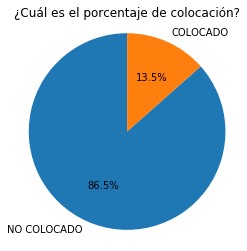

In [3]:
postulaciones_clean['estatusfinalvinculo'].value_counts().plot(kind = 'pie', startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('¿Cuál es el porcentaje de colocación?')
plt.ylabel('');

<a id='programa'></a>
[Return to Table of Contents](#table)
### ¿En cuáles programas se originan las postulaciones?


In [4]:
subprogramas_count = postulaciones_clean['subprograma'].value_counts()
subprogramas_count

PORTAL               4840986
SIISNE               1246746
FERIAS                191840
Abriendo Espacios       3565
BECATE                    49
MOV LAB INT               29
OTRO                      18
Name: subprograma, dtype: int64

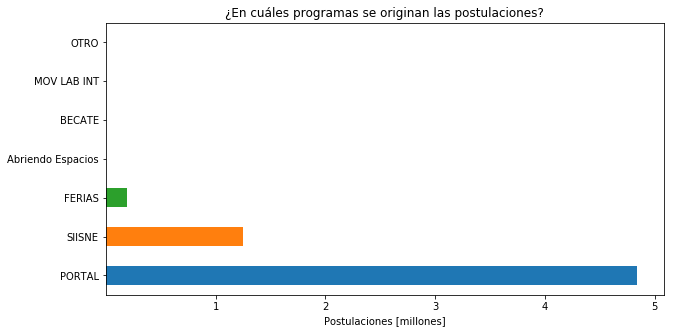

In [7]:
subprogramas_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿En cuáles programas se originan las postulaciones?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 5000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5]
plt.xticks(xticklocs, xticknames);

<a id='vinculo'></a>
[Return to Table of Contents](#table)
### ¿Qué proporciones tienen los diferentes vínculos?


In [13]:
vinculos_count = postulaciones_clean['tipo_vinculo'].value_counts()
vinculos_count

POSTULACIÓN    5897688
ENVÍO           385467
INSCRIPCIÓN         78
Name: tipo_vinculo, dtype: int64

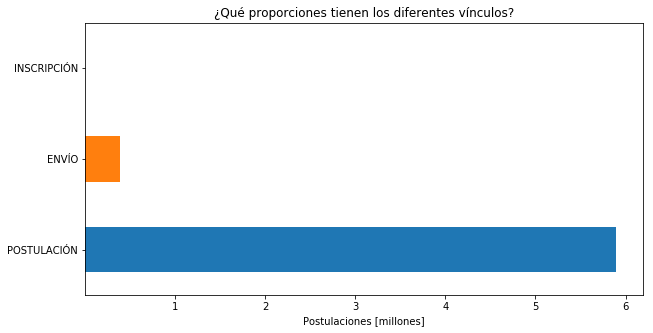

In [16]:
vinculos_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿Qué proporciones tienen los diferentes vínculos?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 6000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5,6]
plt.xticks(xticklocs, xticknames);

In [ ]:
from pywaffle import Waffle
calculated = postulaciones_clean['tipo_vinculo'].value_counts()

fig = plt.figure(FigureClass=Waffle, 
    rows=5,
    values = list(calculated.values),
    labels = list(calculated.index)
)

## References
pd.isin()
- https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

Obtener y filtrar datos de un dataframe
- http://pyciencia.blogspot.com/2015/05/obtener-y-filtrar-datos-de-un-dataframe.html
- https://medium.com/@rtjeannier/pandas-101-cont-9d061cb73bfc